<a href="https://colab.research.google.com/github/rcarvajal208/MachineLearning_Retos/blob/master/Reto5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Se importan las librerias

In [140]:
from sklearn import preprocessing, model_selection
from sklearn.neural_network import MLPClassifier
from google.colab import files
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import random
files.upload()

{}

#Se cargan los datos

In [141]:
musica = pd.DataFrame(pd.read_excel('Reto1_Revisado_Musica.xlsx')).drop(['genre','track_id','title','artist_name'],axis=1)
print(musica.describe())

              type    loudness  ...  var_timbre11  var_timbre12
count  8350.000000  8350.00000  ...   8350.000000   8350.000000
mean      0.519042   -12.71443  ...    350.331967    372.121087
std       0.499667     5.80163  ...    170.406693    181.784508
min       0.000000   -41.03800  ...     49.275323     34.917502
25%       0.000000   -15.90100  ...    230.339339    267.177197
50%       1.000000   -11.70950  ...    317.891281    334.593569
75%       1.000000    -8.39900  ...    435.597608    426.006784
max       1.000000    -0.27800  ...   2049.996543   2417.601217

[8 rows x 31 columns]


#Preprocesamiento de datos


1.   Se resta la media y deja la varianza entre -1 y 1.
2.   Se realizan los conjuntos de datos de entrenamiento, prueba y validación.



In [0]:
#x_multiple = preprocessing.normalize(np.array(musica.drop('type',1)))
scaler = preprocessing.StandardScaler()
x_train = np.array(musica.drop('type',1))
scaler.fit(x_train)
x_multiple = scaler.transform(x_train)
y_multiple = np.array(musica['type'])
porcentajePrueba1 = 0.9
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = model_selection.train_test_split(x_multiple,y_multiple,test_size=1-porcentajePrueba1)
x_entrenamiento, x_validacion, y_entrenamiento, y_validacion = model_selection.train_test_split(x_entrenamiento,y_entrenamiento,test_size=1-porcentajePrueba1)

#Una capa escondida
Ahora se va a revisar la eficiencia de las redes neuronales para una sola capa escondida, teniendo en cuenta diferentes tipos de activación y variando la tasa de aprendizaje desde 0.5 hasta 0.005.

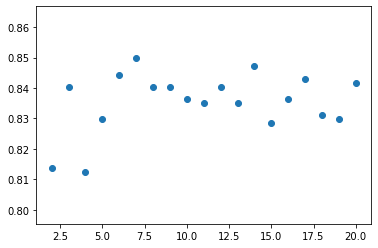

In [143]:
max_iter = int(1e4)
tasa = 0.01
N_neuronas = 2
v_N = []
eficiencia1 = []
while(N_neuronas <= 20): 
  mlp1 = MLPClassifier(hidden_layer_sizes=(N_neuronas,), activation='relu', max_iter=max_iter, alpha=1e-4, tol = 1e-4, verbose=False, learning_rate_init=tasa)
  mlp1.fit(x_entrenamiento, y_entrenamiento)
  v_N.append(N_neuronas)
  eficiencia1.append(mlp1.score(x_validacion, y_validacion))
  N_neuronas += 1
plt.scatter(v_N, eficiencia1)
plt.show()

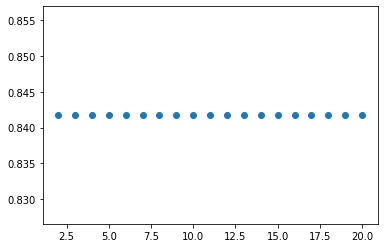

In [144]:
N_neuronas = 2
v_N = []
eficiencia2 = []
while(N_neuronas <= 20):
  mlp2 = MLPClassifier(hidden_layer_sizes=(N_neuronas,), activation='tanh', max_iter=max_iter, alpha=1e-4, tol = 1e-4, verbose=False, learning_rate_init=tasa)
  mlp2.fit(x_entrenamiento, y_entrenamiento)
  v_N.append(N_neuronas)
  eficiencia2.append(mlp1.score(x_validacion, y_validacion))
  N_neuronas += 1
plt.scatter(v_N, eficiencia2)
plt.show()

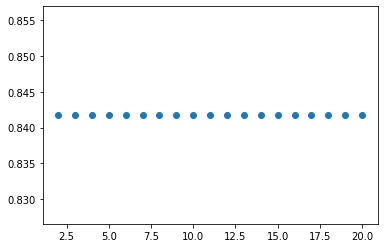

In [145]:
N_neuronas = 2
v_N = []
eficiencia3 = []
while(N_neuronas <= 20):
  mlp3 = MLPClassifier(hidden_layer_sizes=(N_neuronas,), activation='logistic', max_iter=max_iter, alpha=1e-4, tol = 1e-4, verbose=False, learning_rate_init=tasa)
  mlp3.fit(x_entrenamiento, y_entrenamiento)
  v_N.append(N_neuronas)
  eficiencia3.append(mlp1.score(x_validacion, y_validacion))
  N_neuronas += 1
plt.scatter(v_N, eficiencia3)
plt.show()

Luego de experimentar para los tres tipos de activación se observo que:

1.   La tasa de aprendizaje inicial que entregó los mejores resultados fue la de 0.01.
2.   La activación por relu presenta un error empirico menor al de las activaciones sigmoidal y tanh.
3.   Ademas se observó que, tanto las activaciones sigmoidal y tanh, son indiferentes del número de neuronas que se utilice para su entrenamiento.
4.   Finalmente se observó que en general las redes neuronales con 8 o 9 neuronas suelen ser consistentes respecto a sus buenos resultados en la activación por relu. Por otro lado las otras neuronas suelen mostrar variaciones o respuestas por lo general inferiores.


#Evaluación de la red neuronal
Una vez evaluado el error empirico y rteniendo en cuenta el número de datos \\
Se observa que el indice de confianza es :
##$(1-\delta) = (1 - 2/\exp(|S{\small text}|{ \cdot 2\varepsilon^2 }))$

In [146]:
max_iter = int(1e4)
tasa = 0.01
N_neuronas = 9
mlp = MLPClassifier(hidden_layer_sizes=(N_neuronas,), activation='relu', max_iter=max_iter, alpha=1e-4, tol = 1e-4, verbose=False, learning_rate_init=tasa)
mlp.fit(x_entrenamiento, y_entrenamiento)
E_empirico = 1 - mlp.score(x_prueba, y_prueba)
N_datos = y_prueba.shape[0]
confianza = 1 - 2/math.exp(N_datos*2*(E_empirico**2))
print('Número de datos de prueba = ' + str(N_datos))
print('Error empirico = ' + str(E_empirico))
print('indice de confianza = ' + str(confianza))


Número de datos de prueba = 835
Error empirico = 0.14251497005988023
indice de confianza = 0.9999999999999963


#Dos capas escondidas
Ahora se va a revisar la eficiencia de las redes neuronales para una sola capa escondida, teniendo en cuenta diferentes tipos de activación y variando la tasa de aprendizaje desde 0.5 hasta 0.005.*texto en cursiva*

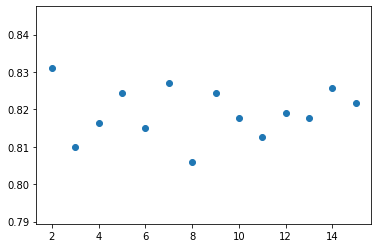

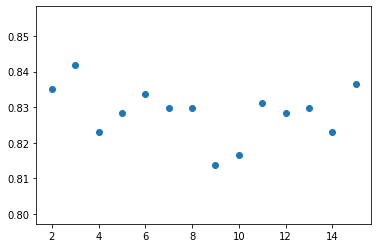

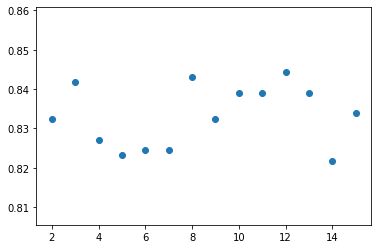

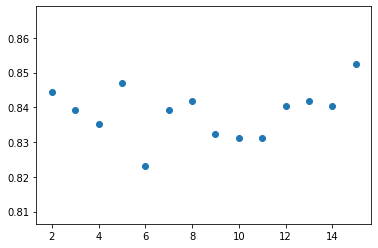

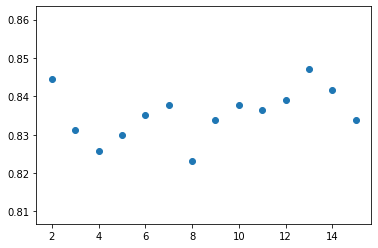

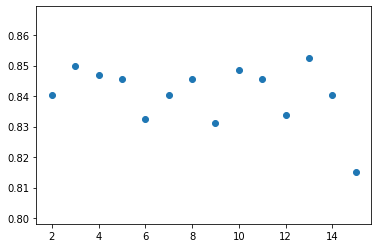

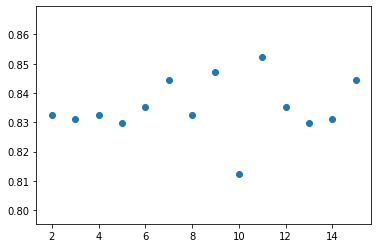

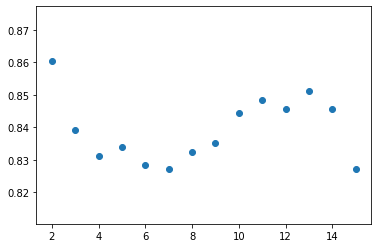

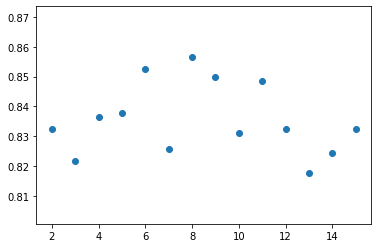

In [147]:
max_iter = int(1e4)
tasa = 0.0075
N_neuronas1 = 2
while(N_neuronas1 <= 10): 
  N_neuronas2 = 2
  v_N = []
  eficiencia1 = []
  while(N_neuronas2 <= 15):
    mlp1 = MLPClassifier(hidden_layer_sizes=(N_neuronas1,N_neuronas2,), activation='relu', max_iter=max_iter, alpha=1e-4, tol = 1e-4, verbose=False, learning_rate_init=tasa)
    mlp1.fit(x_entrenamiento, y_entrenamiento)
    v_N.append(N_neuronas2)
    eficiencia1.append(mlp1.score(x_validacion, y_validacion))
    N_neuronas2 += 1
  N_neuronas1 += 1
  plt.scatter(v_N, eficiencia1)
  plt.show()


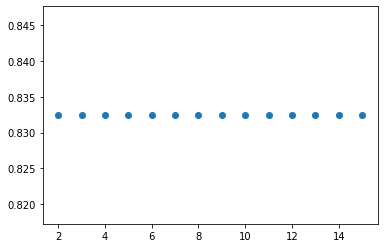

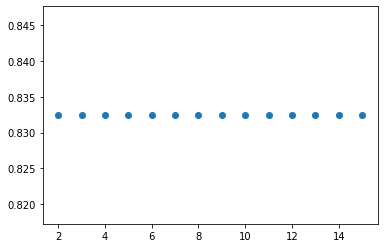

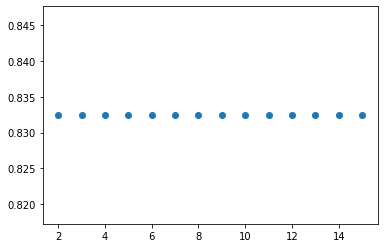

In [148]:
N_neuronas1 = 2 
while(N_neuronas1 <= 4): 
  N_neuronas2 = 2
  v_N = []
  eficiencia2 = []
  while(N_neuronas2 <= 15):
    mlp2 = MLPClassifier(hidden_layer_sizes=(N_neuronas1,N_neuronas2,), activation='tanh', max_iter=max_iter, alpha=1e-4, tol = 1e-4, verbose=False, learning_rate_init=tasa)
    mlp2.fit(x_entrenamiento, y_entrenamiento)
    v_N.append(N_neuronas2)
    eficiencia2.append(mlp1.score(x_validacion, y_validacion))
    N_neuronas2 += 1
  N_neuronas1 += 1
  plt.scatter(v_N, eficiencia2)
  plt.show()

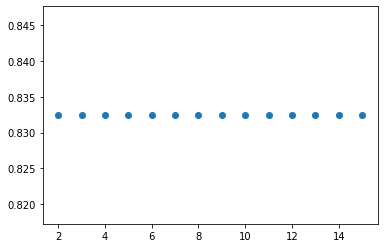

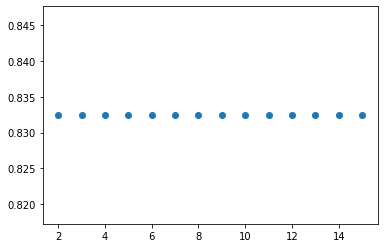

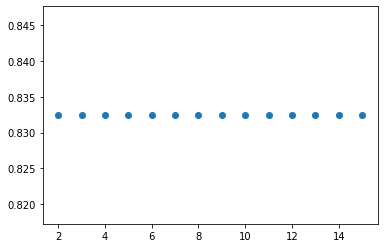

In [149]:
N_neuronas1 = 2 
while(N_neuronas1 <= 4): 
  N_neuronas2 = 2
  v_N = []
  eficiencia3 = []
  while(N_neuronas2 <= 15):
    mlp3 = MLPClassifier(hidden_layer_sizes=(N_neuronas1,N_neuronas2,), activation='logistic', max_iter=max_iter, alpha=1e-4, tol = 1e-4, verbose=False, learning_rate_init=tasa)
    mlp3.fit(x_entrenamiento, y_entrenamiento)
    v_N.append(N_neuronas2)
    eficiencia3.append(mlp1.score(x_validacion, y_validacion))
    N_neuronas2 += 1
  N_neuronas1 += 1
  plt.scatter(v_N, eficiencia3)
  plt.show()

Luego de experimentar para los tres tipos de activación se observo que:

1.   La tasa de aprendizaje inicial que entregó los mejores resultados fue la de 0.01.
2.   La activación por relu presenta un error empirico menor al de las activaciones sigmoidal y tanh.
3.   Ademas se observó que, tanto las activaciones sigmoidal y tanh, son indiferentes del número de neuronas que se utilice para su entrenamiento.
4.   Finalmente se observó que en general las redes neuronales con 8 o 9 neuronas suelen ser consistentes respecto a sus buenos resultados en la activación por relu. Por otro lado las otras neuronas suelen mostrar variaciones o respuestas por lo general inferiores.


#Evaluación de la red neuronal
Una vez evaluado el error empirico y rteniendo en cuenta el número de datos \\
Se observa que el indice de confianza es :
##$(1-\delta) = (1 - 2/\exp(|S{\small text}|{ \cdot 2\varepsilon^2 }))$

In [150]:
max_iter = int(1e4)
tasa = 0.075
N_neuronas1 = 9
N_neuronas2 = 8
mlp = MLPClassifier(hidden_layer_sizes=(N_neuronas1,N_neuronas2,), activation='relu', max_iter=max_iter, alpha=1e-4, tol = 1e-4, verbose=False, learning_rate_init=tasa)
mlp.fit(x_entrenamiento, y_entrenamiento)
E_empirico = 1 - mlp.score(x_prueba, y_prueba)
N_datos = y_prueba.shape[0]
confianza = 1 - 2/math.exp(N_datos*2*(E_empirico**2))
print('Número de datos de prueba = ' + str(N_datos))
print('Error empirico = ' + str(E_empirico))
print('indice de confianza = ' + str(confianza))

Número de datos de prueba = 835
Error empirico = 0.14491017964071862
indice de confianza = 0.9999999999999988


#Prueba random con red de tres capas

In [151]:
max_iter = int(1e4)
tasa = 0.075
N_neuronas1 = 9
N_neuronas2 = 8
N_neuronas3 = 3
mlp = MLPClassifier(hidden_layer_sizes=(N_neuronas1,N_neuronas2,N_neuronas3,), activation='relu', max_iter=max_iter, alpha=1e-4, tol = 1e-4, verbose=False, learning_rate_init=tasa)
mlp.fit(x_entrenamiento, y_entrenamiento)
E_empirico = 1 - mlp.score(x_prueba, y_prueba)
N_datos = y_prueba.shape[0]
confianza = 1 - 2/math.exp(N_datos*2*(E_empirico**2))
print('Número de datos de prueba = ' + str(N_datos))
print('Error empirico = ' + str(E_empirico))
print('indice de confianza = ' + str(confianza))

Número de datos de prueba = 835
Error empirico = 0.15329341317365275
indice de confianza = 1.0


#Conclusiones


1.   Tanto las función de activación tipo tanh como sigmoidal presentan un mismo error empirico sin importar el número de neuronas que se esten utilizando para su entrenamiento o la cantidad de capas.
2.   Por otro lado, la funciión de activación tipo relu presenta resultados diferentes tanto en cada entrenamiento como en cada tipo de red neuronal utilizada. Sin embargo esta es capaz de generar resultados con un error empirico menor al que se presenta en las otras dos funciones de activación
3.   Sin embargo, el error empirico tambien se satura sin importar el número neuronas o capas que se esten utilizando.



